In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('Frogs_MFCCs.csv')
df.head()


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [21]:
# ----------------------------
# 1. Data Preprocessing and Exploration
# ----------------------------

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


In [22]:
# ----------------------------
# 2. Handle Categorical Variables
# ----------------------------

# Identify categorical columns (string values)
categorical_cols = ['Family', 'Genus', 'Species']  # Adjust these as per your dataset

# Label Encoding for categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the label encoder for inverse transform if needed


In [24]:
# Option 1: Imputing missing values with the mean for numerical data
df.fillna(df.mean(), inplace=True)
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,3,0,0,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,3,0,0,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,3,0,0,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,3,0,0,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,3,0,0,1


In [25]:
# ----------------------------
# 3. Feature Scaling
# ----------------------------

# Select the first 22 MFCC features for clustering
mfcc_features = df.iloc[:, :22]

# Standardizing the MFCC features
scaler = StandardScaler()
scaled_mfcc_features = scaler.fit_transform(mfcc_features)


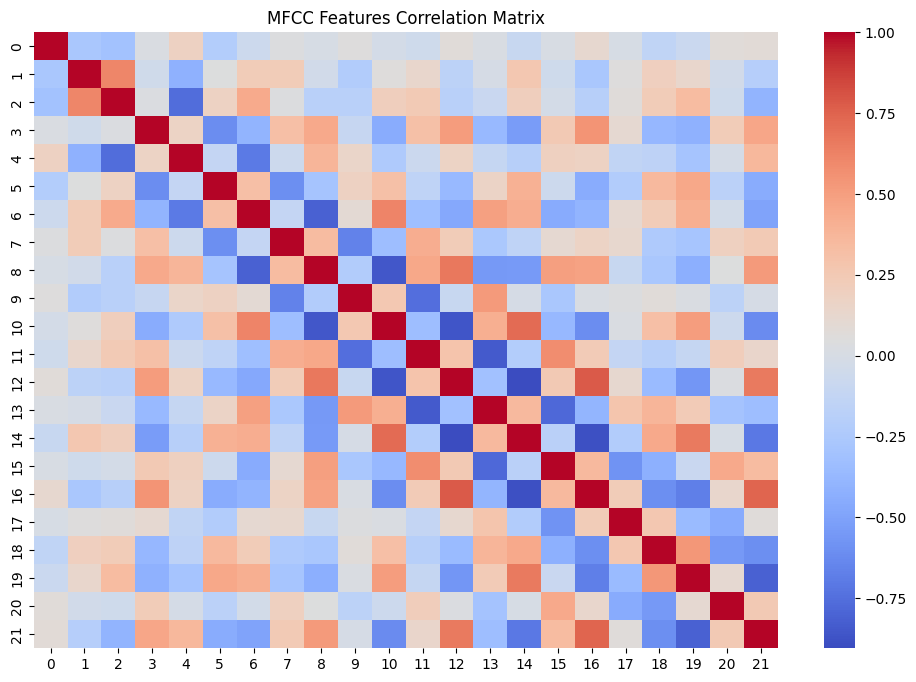

In [26]:
# ----------------------------
# 4. Feature Correlation Analysis
# ----------------------------

# Plot the correlation matrix
corr_matrix = pd.DataFrame(scaled_mfcc_features).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('MFCC Features Correlation Matrix')
plt.show()

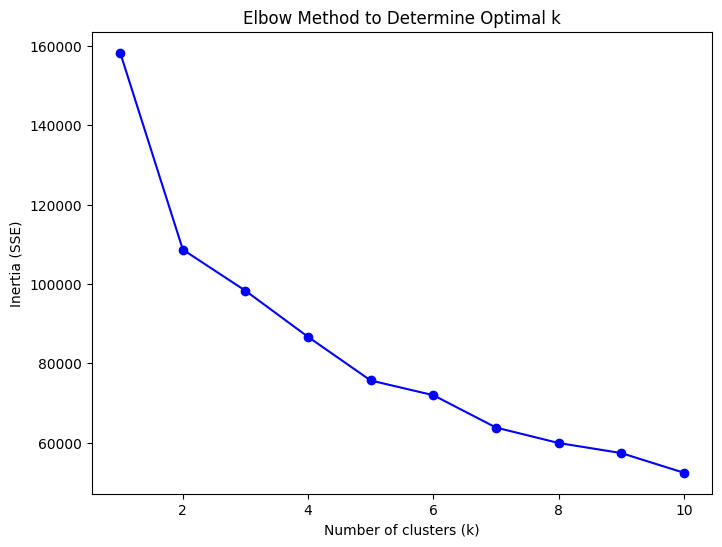

In [27]:
# ----------------------------
# 5. K-Means Clustering with Elbow Method
# ----------------------------

# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_mfcc_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# Based on the elbow method, let's assume the optimal number of clusters is 3 (you can adjust based on the plot)
optimal_k = 3

In [28]:

# ----------------------------
# 6. Implement K-Means Clustering and Evaluate with Silhouette Score
# ----------------------------

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_mfcc_features)

# Silhouette Score
sil_score = silhouette_score(scaled_mfcc_features, clusters)
print(f'Silhouette Score for k={optimal_k}: {sil_score}')

Silhouette Score for k=3: 0.3336517041041939


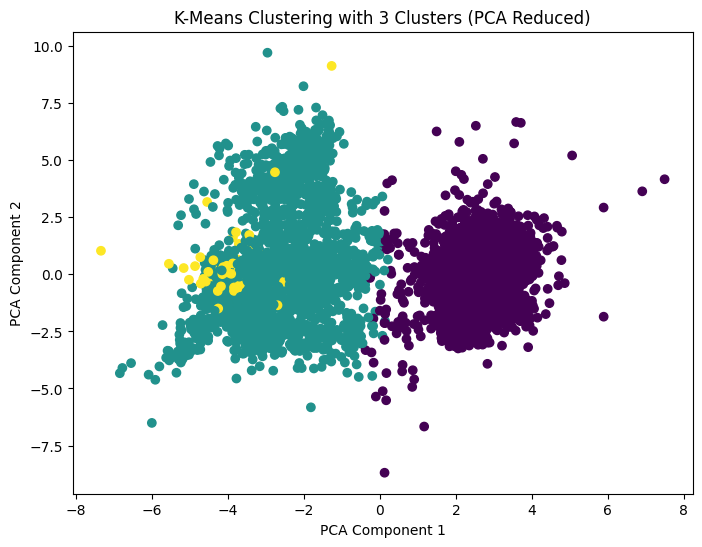

In [29]:
# ----------------------------
# 7. Visualize Clusters with PCA
# ----------------------------

# Apply PCA for dimensionality reduction (2D visualization)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_mfcc_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title(f'K-Means Clustering with {optimal_k} Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [30]:

# ----------------------------
# 8. Additional Cluster Evaluation Metrics
# ----------------------------

# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_mfcc_features, clusters)
print(f'Davies-Bouldin Index: {db_index}')

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(scaled_mfcc_features, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')

Davies-Bouldin Index: 1.2655388064008637
Calinski-Harabasz Index: 2194.5782371896794


In [31]:

# ----------------------------
# 9. Compare with Other Clustering Algorithms (e.g., Agglomerative Clustering or DBSCAN)
# ----------------------------

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [32]:
# Agglomerative Clustering
agglo_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agglo_clusters = agglo_clustering.fit_predict(scaled_mfcc_features)

In [33]:
# DBSCAN (tuning eps and min_samples might be required)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_mfcc_features)

In [34]:
# Evaluate Agglomerative Clustering using Silhouette Score
agglo_sil_score = silhouette_score(scaled_mfcc_features, agglo_clusters)
print(f'Agglomerative Clustering Silhouette Score: {agglo_sil_score}')

Agglomerative Clustering Silhouette Score: 0.34917834306499484


In [35]:

# Evaluate DBSCAN Clustering using Silhouette Score
# Ignore noise points (-1 labels) for silhouette score evaluation
dbscan_sil_score = silhouette_score(scaled_mfcc_features[dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])
print(f'DBSCAN Clustering Silhouette Score: {dbscan_sil_score}')

DBSCAN Clustering Silhouette Score: 0.2341468111706052
